In [49]:
import numpy as np
import matplotlib.pyplot as plt	

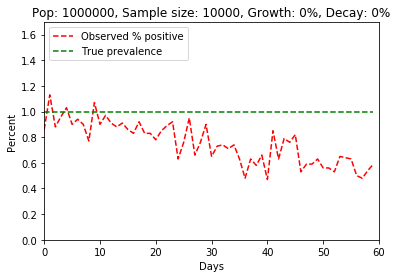

In [113]:
#initial parameters
prevalence_true = 0.01
pop_size = int(1E6)
sample_size = int(1E4)

# infection growth (between 0 and 1)
add = 0
remove = 0

# days 
days = 60

#--------------------------------------

# result lists
new_pos_list = []
pos_true_list = []
prevalence_true_list = []

# inital values
pos_true = int(pop_size * prevalence_true) # true positives
pos_true_pp = 0 # true positives previously tested positive
pos_true_npp = pos_true - pos_true_pp # true positives not previously tested positive


for _ in range(days):

    # 0 = negative, 1 = true positive NOT previously tested positive, 2 = true positive previously tested positive
    population = [2] * pos_true_pp + [1] * pos_true_npp + [0] * (pop_size - pos_true)

    sample = np.random.choice(population, sample_size, replace = False) # draw random sample from population
    new_pos = sample.tolist().count(1) # count positives NOT previously tested positive

    #print("New pos: " + str(new_pos))
    
    # draw recovered persons randomly from positive population
    r = int(remove * pos_true) # number of positives to remove from positive pool
    recovered = np.random.choice([person for person in population if person is not 0], r, replace = False)
    
    # calculate new size of positive population
    pos_true = int(pos_true + pos_true * (add - remove))
    
    # calculate new number of true positives previosly tested positive
    pos_true_pp = pos_true_pp + new_pos - recovered.tolist().count(2)
    
    # calculate new number of true positives NOT previosly tested positive
    pos_true_npp = pos_true - pos_true_pp
    
    # append results to lists
    pos_true_list.append(pos_true)
    new_pos_list.append(new_pos)
    prevalence_true_list.append(pos_true/pop_size)
    
    
# plotting

f = 1/sample_size * 100

plt.axis([0, days, 0, max(new_pos_list)* f * 1.5])
plt.plot(range(days), [i * f for i in new_pos_list], "r--", markersize = 5, label = "Observed % positive")
plt.plot(range(days), [i * 100 for i in prevalence_true_list], "g--", markersize = 5, label = "True prevalence")
plt.title("Pop: " + str(pop_size) + \
          ", Sample size: " + str(sample_size) + \
          ", Growth: " + str(add * 100) + "%" + \
          ", Decay: " + str(remove * 100) + "%")
plt.xlabel('Days')
plt.ylabel('Percent')
plt.legend(loc = "upper left")
plt.show()